### US009 - Water consumption of green spaces

#### · Introduction

###### This US deals with the analysis of water consumption in green spaces, using consumption data provided in a CSV file named "water_consumption". The objective of this analysis is to examine water consumption patterns over time and across different parks, identify possible outliers in the data, and calculate the associated cost of consumption. These insights are crucial for efficient water resource management and also for ensuring the environmental sustainability of green spaces.



#### · Code and results

· The cost of consumption of water by each park:

        Park  Year  Month         Cost
0   ArcaAgua  2023      1   107.940000
1   ArcaAgua  2023      2   102.348750
2   ArcaAgua  2023      3   153.820800
3   ArcaAgua  2023      4   165.319875
4   ArcaAgua  2023      5   241.447500
5   ArcaAgua  2023      6   288.730969
6   ArcaAgua  2023      7   381.996956
7   ArcaAgua  2023      8   367.186109
8   ArcaAgua  2023      9   249.024142
9   ArcaAgua  2023     10   180.738486
10  ArcaAgua  2023     11   139.220007
11  ArcaAgua  2023     12   130.617416
12  ArcaAgua  2024      1   118.860000
13  ArcaAgua  2024      2   106.942500
14  ArcaAgua  2024      3   137.327400
15    Cidade  2023      1   806.302000
16    Cidade  2023      2   794.365075
17    Cidade  2023      3   845.503435
18    Cidade  2023      4   956.501481
19    Cidade  2023      5   996.623523
20    Cidade  2023      6  1219.726802
21    Cidade  2023      7  1352.366027
22    Cidade  2023      8  1313.568442
23    Cidade  

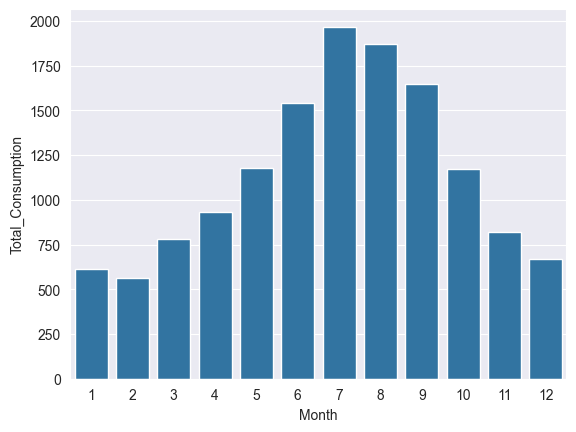

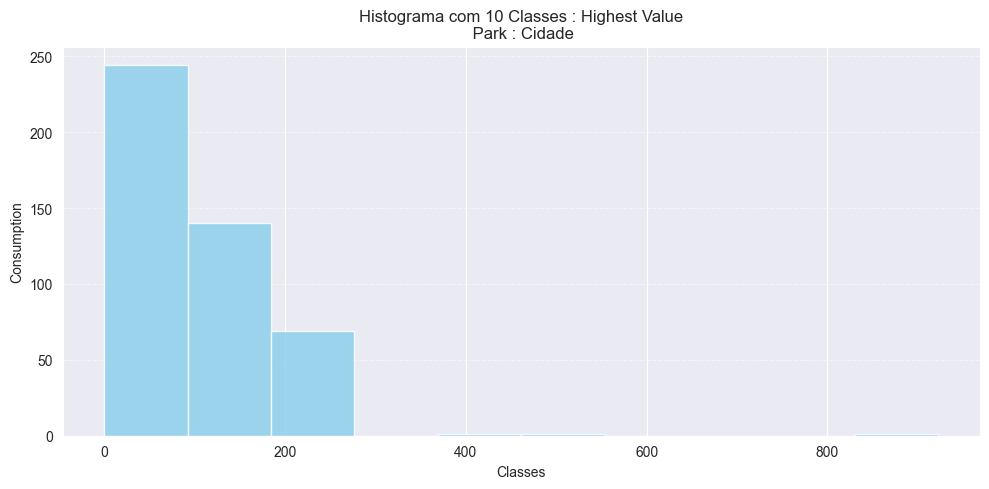

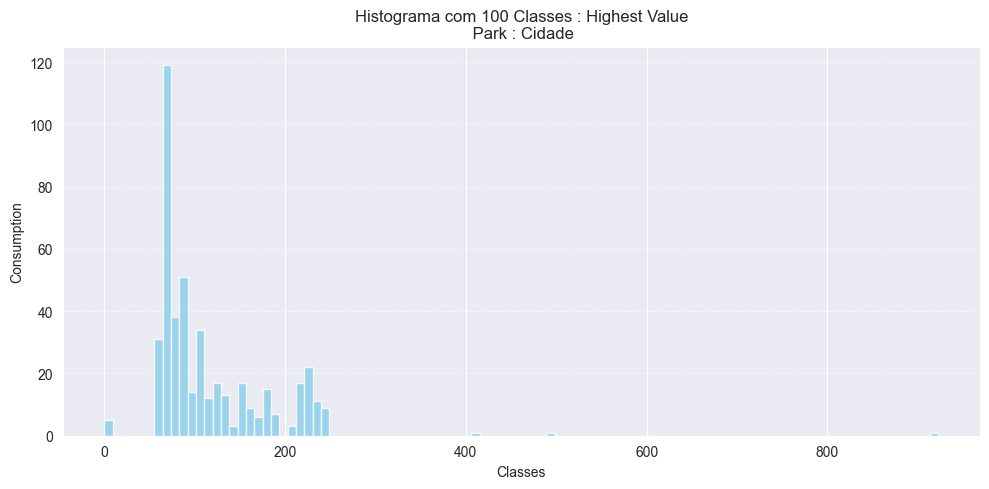

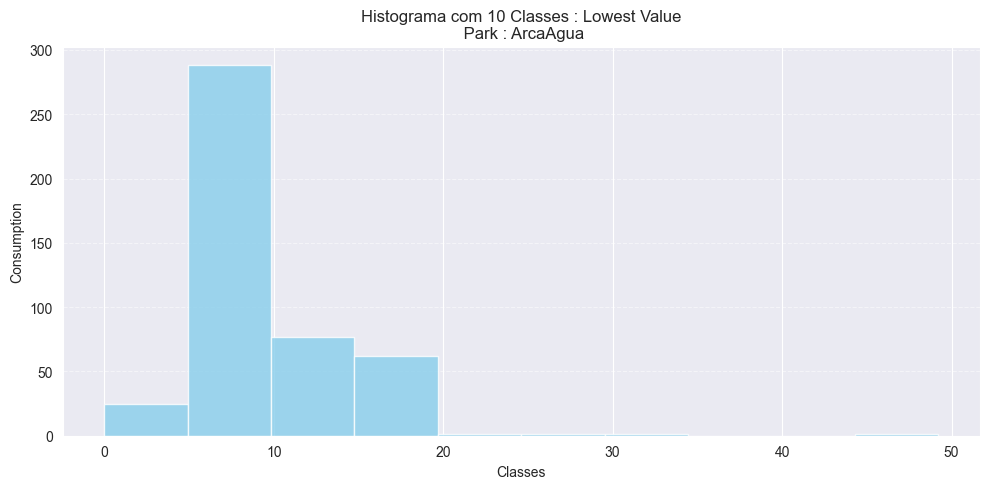

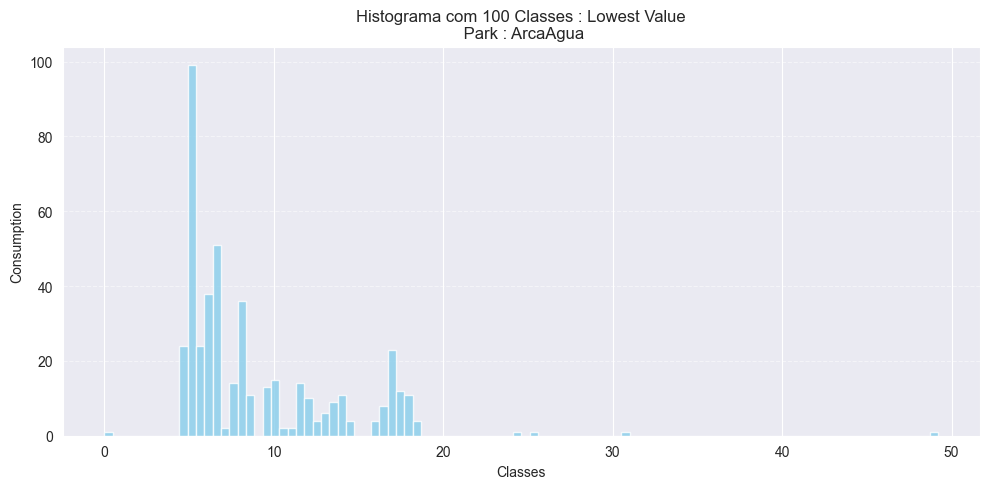

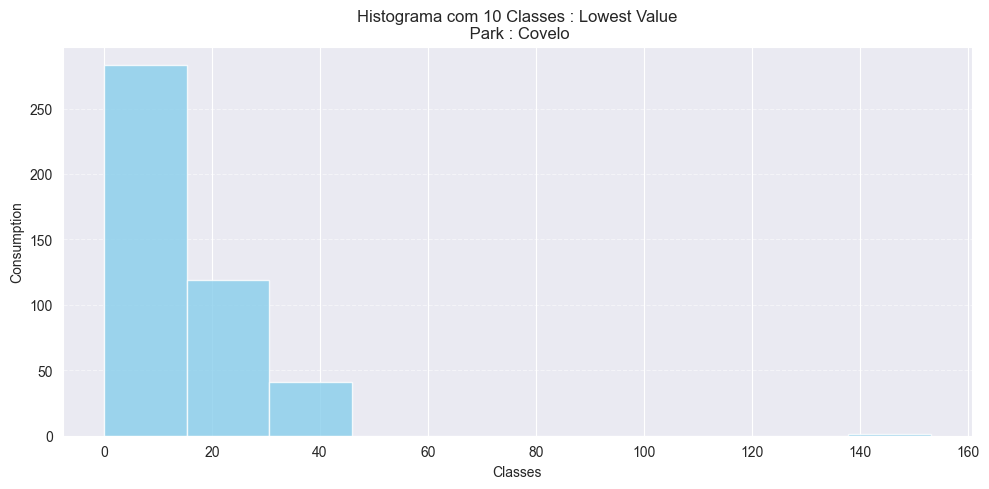

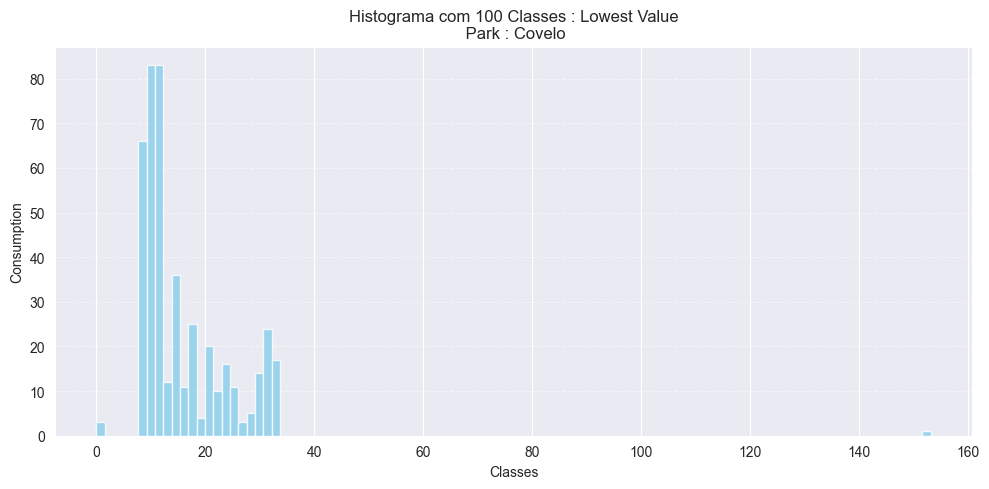

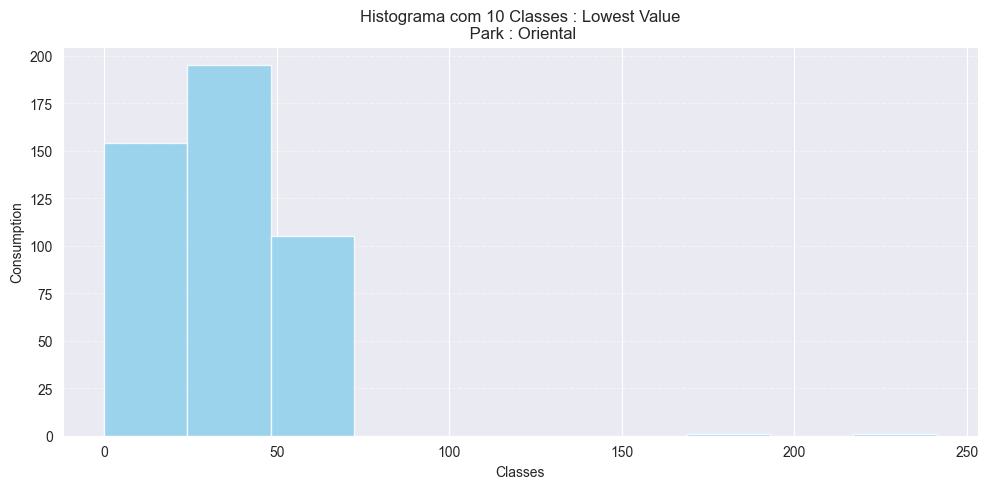

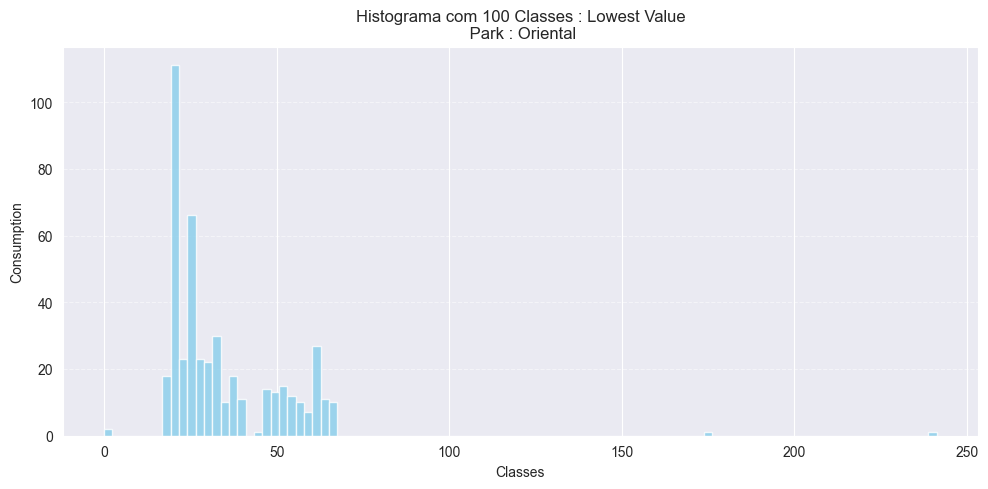

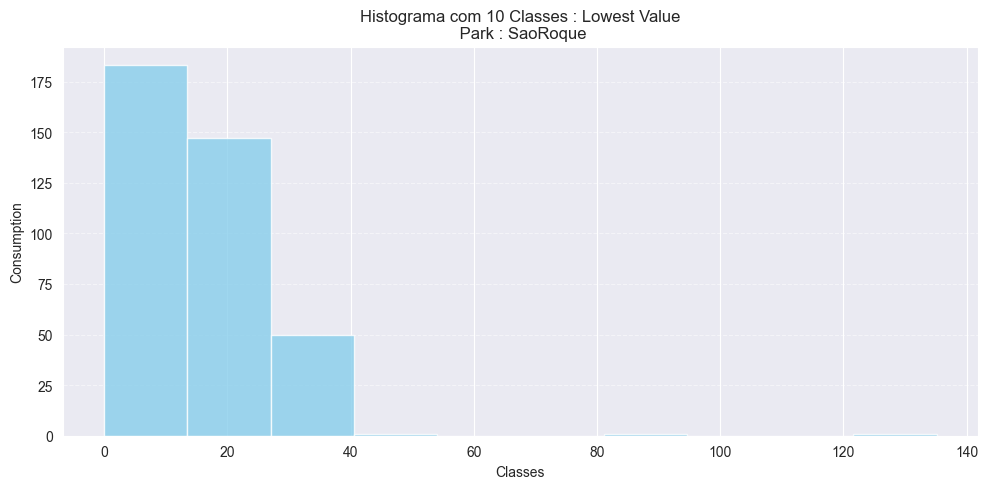

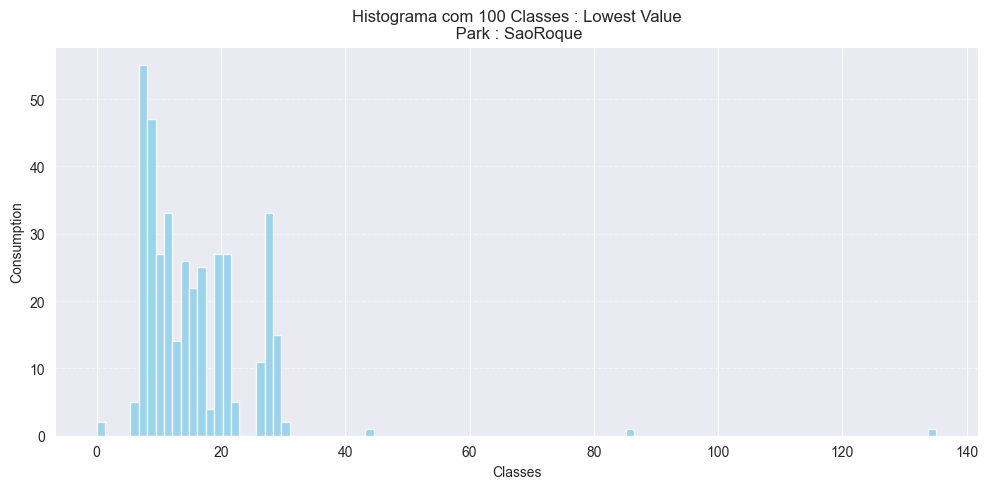

In [2]:
# Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


#Variables
# PATH_FILE = input('Enter the path of the file (water consumption.csv): ')

PATH_FILE = "water_consumption.csv"
WTPRC_1000M3 = 0.7
WTCONSUPTIONUPTO = 1000
WTPRC_FEE = 0.15
FIRST_MONTH = 1
LAST_MONTH = 12
CLASSES10 = 10
CLASSES100 = 100

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


##Reading file "water_consumption.csv"
data = pd.read_csv(PATH_FILE, sep=";")
data['Consumption'] = data['Consumption'].str.replace(',', '.')
data['Consumption'] = pd.to_numeric(data['Consumption'], errors='coerce')



#####################WaterCost by month and park

def calculate_cost(Consumption):
    if Consumption <= WTCONSUPTIONUPTO:
        return Consumption * WTPRC_1000M3
    else:
        return (WTCONSUPTIONUPTO * WTPRC_1000M3) + ((Consumption - WTCONSUPTIONUPTO) * WTPRC_1000M3 * WTPRC_FEE)

data['Total_Consumption'] = data.groupby(['Park', 'Year', 'Month'])['Consumption'].transform('sum')
consumptionInfo = data.groupby(['Park', 'Year', 'Month'])['Total_Consumption'].unique().explode().reset_index(name='Total_Consumption')
consumptionInfo['Cost'] = consumptionInfo['Total_Consumption'].apply(calculate_cost)
cost_summary = consumptionInfo.loc[:, ["Park", "Year", "Month", "Cost"]]
print("· The cost of consumption of water by each park:\n")
print(cost_summary)





###########################BarPlot
print("· I - Barplot representing monthly water consumption\n")


years = data["Year"].unique()
parks = data["Park"].unique()

year = int(input("Enter the year: "))
while year not in years:
    year = int(input("Enter a year existent in the water_consumption.csv: "))

start_month = int(input("Enter the start month: "))   
while  start_month < FIRST_MONTH or start_month > LAST_MONTH: 
    start_month = int(input("INVALID: Enter a valid start month: "))
    
    
end_month = int(input("Enter the end month: "))
while end_month < FIRST_MONTH or end_month > LAST_MONTH:
    end_month = int(input("INVALID: Enter a valid end month: "))
    
while start_month > end_month:
    start_month = int(input(f"INVALID:Start month > End month ({start_month} > {end_month})\nEnter a valid start month: "))


parkId = input("Enter the Park name: ")
while parkId not in parks:
    parkId = input("Enter a existent Park id in the water_consumption.csv: ")


filtered_data = consumptionInfo[(consumptionInfo['Park'] == parkId) & 
                                (consumptionInfo['Year'] == year) & 
                                (consumptionInfo['Month'] >= start_month) & 
                                (consumptionInfo['Month'] <= end_month)]

sns.barplot(x="Month", y="Total_Consumption", data=filtered_data)






#########################Avarage of monthly cost
print("· II\n")
numberOfParks = int(input("Enter the number of Parks to see average monthly cost: "))
while numberOfParks > len(parks) or numberOfParks < 0:
    numberOfParks = int(input(f"Enter a valid number of Parks (existent parks {len(parks):.0f}): "))

if numberOfParks  != 0: 
    idParksAverage = []
    for i in range(numberOfParks):
        id = input(f"Enter the Park name (nº:{i+1}) to see average monthly cost: ")
        while id not in parks:
            id = input(f"Enter a existent Park (nº:{i+1}): ")
        while idParksAverage.__contains__(id) or id not in parks:
            id = input(f"Duplicate park, enter a new one (nº:{i+1}): ")
        idParksAverage.append(id)
    
    # Calculate average monthly cost for specified parks
    average_cost_per_park = cost_summary.groupby('Park')['Cost'].mean()
    
    # Display average monthly cost for specified parks
    print("Average Monthly Cost for Each Specified Park:")
    for park_id in idParksAverage:
        if park_id in average_cost_per_park.index:
            print(f"Park ID: {park_id}, Average Monthly Cost: {average_cost_per_park[park_id]:.2f}€")
else:
    print("Selected 0 parks, no average monthly cost\n")
    
    
    


#########################Ultima tarefa
print("· III\n")


# Statistics
print("·· 1) Calculate statistics for the park/s with the highest and lowest consumption.\n")

##HIGHEST
print("··· Highest consumption park/s.\n")
highest_consumption_park = data.groupby('Park')['Consumption'].max()
maxValue = highest_consumption_park.max()

for park_id, value in highest_consumption_park.items():
    if value == maxValue:
        park_with_highest_consumption = park_id
        # Calculate statistics for the park with the highest consumption
        highest_consumption_stats = data[data['Park'] == park_with_highest_consumption]['Consumption'].agg(['mean', 'median', 'std', 'skew'])
        highest_consumption_stats = highest_consumption_stats.rename(lambda x: f'{park_with_highest_consumption}_{x}')
        print(f"Statistics for the park ({park_with_highest_consumption} - {highest_consumption_park.max():.2f} m3):")
        print(highest_consumption_stats.to_string())
        print()


##lOWEST
print("··· Lowest consumption park/s.\n")
lowest_consumption_park = data.groupby('Park')['Consumption'].min()
minValue = lowest_consumption_park.min()

for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()):
        park_with_lowest_consumption = park_id
        # Calculate statistics for the park with the lowest consumption
        lowest_consumption_stats = data[data['Park'] == park_with_lowest_consumption]['Consumption'].agg(['mean', 'median', 'std', 'skew'])
        lowest_consumption_stats = lowest_consumption_stats.rename(lambda x: f'{park_with_lowest_consumption}_{x}')
        print(f"Statistics for the park ({park_with_lowest_consumption} - {lowest_consumption_park.min():.2f} m3):")
        print(lowest_consumption_stats.to_string())
        print()





# Build relative and absolute frequency tables
print("·· 2) Build relative and absolute frequency tables.\n")
C = 5

##HIGHEST
print("··· Highest consumption park/s.\n")
for park_id, value in highest_consumption_park.items():
    if value == maxValue:
        park_with_highest_consumption = park_id
        park_with_highest_consumption_data = data[data['Park'] == park_with_highest_consumption]['Consumption']
        
        n_highest = len(park_with_highest_consumption_data)
        data_min_highest = park_with_highest_consumption_data.min()
        data_max_highest = park_with_highest_consumption_data.max()
        
        # Divide em 5 classes
        class_interval_highest = (data_max_highest - data_min_highest) / C 
         # Limite inferior e superior de cada classe
        class_limits_highest = [data_min_highest + i * class_interval_highest for i in range(C+1)] 
        #Intervalos
        classes_highest = [[round(class_limits_highest[i],2) ,round(class_limits_highest[i+1],2)] for i in range(C)]
        
        #FQ absoluta
        absolute_frequencies_highest = [sum(1 for value in park_with_highest_consumption_data if class_limits_highest[i] <= value < class_limits_highest[i+1]) for i in range(C)]
        #FQ relativa
        relative_frequencies_highest = [round((freq / n_highest) *100,2) for freq in absolute_frequencies_highest] 
        #FQ acumulada
        acumulate_frequencies_highest = []
        soma = 0
        for i in absolute_frequencies_highest:
            soma += i
            acumulate_frequencies_highest.append(soma)
        
        dados = {
            "Classes": classes_highest,
            "Freq_abs": absolute_frequencies_highest,
            "Freq_rel": relative_frequencies_highest,
            "Freq_acum": acumulate_frequencies_highest
        }
        
        df = pd.DataFrame(dados)
        print(f"Park : {park_id}")
        print(df)
        print()
  
  
##lOWEST
print("··· Lowest consumption park/s.\n")      

for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()):    
        park_with_lowest_consumption = park_id
        park_with_lowest_consumption_data = data[data['Park'] == park_with_lowest_consumption]['Consumption']
        n_lowest = len(park_with_lowest_consumption_data)
        
        data_min_lowest = park_with_lowest_consumption_data.min()
        data_max_lowest = park_with_lowest_consumption_data.max()
        # Divide em 5 classes
        class_interval_lowest = (data_max_lowest - data_min_lowest) / C  
        class_limits_lowest = [data_min_lowest + i * class_interval_lowest for i in range(C+1)]  # Limite inferior e superior de cada classe        
        classes_highest = [[round(class_limits_lowest[i],2) ,round(class_limits_lowest[i+1],2)] for i in range(C)]
        
        #FQ absoluta
        absolute_frequencies_highest = [sum(1 for value in park_with_lowest_consumption_data if class_limits_lowest[i] <= value < class_limits_lowest[i+1]) for i in range(C)]
        #FQ relativa
        relative_frequencies_highest = [round((freq / n_lowest) *100,2) for freq in absolute_frequencies_highest] 
        #FQ acumulada
        acumulate_frequencies_highest = []
        soma = 0
        for i in absolute_frequencies_highest:
            soma += i
            acumulate_frequencies_highest.append(soma)
        
        dados = {
            "Classes": classes_highest,
            "Freq_abs": absolute_frequencies_highest,
            "Freq_rel": relative_frequencies_highest,
            "Freq_acum": acumulate_frequencies_highest
        }
        
        df = pd.DataFrame(dados)
        print(f"Park : {park_id}")
        print(df)
        print()
        
        
####Outliers


# Group the data by each park
grouped_data = data.groupby('Park')

# Iterate over each group (park)
for park, group in grouped_data:
    # Calculate median and interquartile range (IQR)
    median = group['Consumption'].median()
    q1 = group['Consumption'].quantile(0.25)
    q3 = group['Consumption'].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = group[(group['Consumption'] < lower_bound) | (group['Consumption'] > upper_bound)]
    
    # Print results
    if not outliers.empty:
        print(f"Outliers found for {park}:")
        print(outliers)
    else:
        print(f"No outliers found for {park}")

        
####Histograma

for park_id, value in highest_consumption_park.items():
    if value == maxValue: 
        consumption_park = data[data['Park'] == park_id]['Consumption']
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES10, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 10 Classes : Highest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES100, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 100 Classes : Highest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        

        
for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()): 
        consumption_park = data[data['Park'] == park_id]['Consumption']
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES10, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 10 Classes : Lowest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES100, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 100 Classes : Lowest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        
        
        


#### · Analysis and Interpretation of the Results:

This data analysis revealed interesting water consumption patterns in different parks over time. Additionally, outliers were identified in some parks, indicating cases of excessive or unusual consumption. The generated histograms provide a clear visualization of the distribution of water consumption in each park, allowing for comparison across different data classes. These insights are crucial for efficient water resource management, enabling the identification of areas that require greater attention and intervention


#####   1) Cost of Water Consumption per Park:
Analyzing the cost of water consumption per park provides a clear understanding of the expenses associated with maintaining these green spaces. This helps identify which parks have the highest water consumption costs and can guide decisions regarding resource allocation and implementation of conservation measures.

#####  2) Monthly Water Consumption Barplot:

Bar plots representing monthly water consumption allow visualizing seasonal patterns in water consumption in each park. This can reveal peak consumption months influenced by factors such as weather, seasonal events, or specific activities conducted in the parks.

#####  3) Average Monthly Cost per Park:

Calculating the average monthly cost per park offers an overview of the average expenses of each park over time. This assists in identifying cost trends and comparing the performance of different parks in terms of water usage efficiency.

#####  4) Consumption Statistics for Parks with Highest and Lowest Consumption:

Consumption statistics for parks with the highest and lowest consumption provide a detailed understanding of the distributions of water consumption in each park. This includes measures of central tendency (mean, median), dispersion (standard deviation), and distribution shape (skewness). These statistics help identify parks with extreme consumption patterns and understand the variability in the data.

#####  5) Relative and Absolute Frequency Tables:

Relative and absolute frequency tables offer a detailed view of the distribution of water consumption in specific intervals for parks with the highest and lowest consumption. This helps identify the most common consumption intervals and assess the uniformity or disparity in consumption distribution among different parks.

##### 6) Outlier Detection:

Identifying outliers in water consumption data allows pinpointing unusual observations that may indicate issues such as leaks, measurement errors, or anomalous consumption patterns. This aids in identifying areas requiring further investigation or corrective action.

#####  7) Histograms with 10 and 100 Classes:

Histograms with different numbers of classes provide a visual representation of the distribution of water consumption in each park. This allows visualizing the shape of the distribution, identifying clustering patterns, and assessing the uniformity of consumption distribution across different intervals.

